In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import scipy.sparse

#### Load TF-IDF features & Label

In [7]:
# Load TF-IDF features
X_train = scipy.sparse.load_npz("D:/Projects/Sentiment_Analysis/data/features/TF_IDF/X_train_tfidf.npz")
X_dev   = scipy.sparse.load_npz("D:/Projects/Sentiment_Analysis/data/features/TF_IDF/X_dev_tfidf.npz")

# Load labels
y_train = pd.read_csv("D:/Projects/Sentiment_Analysis/data/processed/train_clean.csv")["sentiment"]
y_dev   = pd.read_csv("D:/Projects/Sentiment_Analysis/data/processed/dev_clean.csv")["sentiment"]

#### Check for imbalance

In [8]:
import pandas as pd
train_df = pd.read_csv("D:/Projects/Sentiment_Analysis/data/processed/train_clean.csv")
print(train_df["sentiment"].value_counts())


sentiment
2    5643
0    5325
1     458
Name: count, dtype: int64


Classes 0 and 2 are almost balanced → okay.

But class 1 (only 458 samples) is very small — only 1/10 compared to the other classes.
→ The model can easily “ignore” this class, predicting only 0 or 2 to increase accuracy.

#### Initialize and Train Logistic Regression

In [10]:
lr_model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'  
)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


#### Predict on dev set

In [11]:
y_pred = lr_model.predict(X_dev)

### Evaluate results

In [12]:
print("Accuracy:", accuracy_score(y_dev, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_dev, y_pred))
print("\nClassification Report:\n", classification_report(y_dev, y_pred, digits=4))

✅ Accuracy: 0.7867972204674668

Confusion Matrix:
 [[1104  187  118]
 [  60   75   32]
 [ 178  100 1312]]

Classification Report:
               precision    recall  f1-score   support

           0     0.8227    0.7835    0.8026      1409
           1     0.2072    0.4491    0.2836       167
           2     0.8974    0.8252    0.8598      1590

    accuracy                         0.7868      3166
   macro avg     0.6424    0.6859    0.6486      3166
weighted avg     0.8277    0.7868    0.8039      3166



#### Visualize the results:

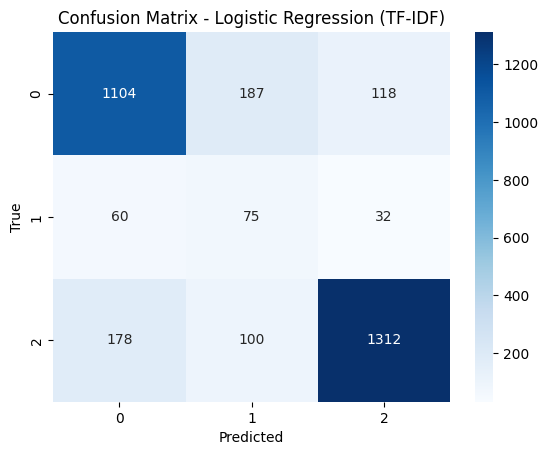

In [14]:
cm = confusion_matrix(y_dev, y_pred, labels=lr_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression (TF-IDF)")
plt.show()

### Observations
In the initial experiment with Logistic Regression, the training dataset was imbalanced across classes, causing the model to be biased toward predicting the majority class. As a result, although the overall accuracy appeared acceptable, the model performed poorly on minority classes, with low precision and recall, reducing its practical effectiveness.

### Mitigation Approach
To address the class imbalance issue, a simple and effective method is to apply **RandomOverSampler**. This technique creates additional copies of samples from the minority classes in the training set, balancing the class distribution. Training Logistic Regression on the oversampled data allows the model to better learn the features of minority classes, improving recall and F1-score while maintaining reasonable overall accuracy.
